In [3]:
!wget https://pysource.com/wp-content/uploads/2019/06/yolo_object_detection.zip

--2020-10-22 05:54:27--  https://pysource.com/wp-content/uploads/2019/06/yolo_object_detection.zip
Resolving pysource.com (pysource.com)... 172.67.180.33, 104.24.124.175, 104.24.125.175
Connecting to pysource.com (pysource.com)|172.67.180.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2890443 (2.8M) [application/zip]
Saving to: ‘yolo_object_detection.zip’

yolo_object_detecti 100%[===================>]   2.76M  1.78MB/s    in 1.5s    

2020-10-22 05:54:30 (1.78 MB/s) - ‘yolo_object_detection.zip’ saved [2890443/2890443]



In [6]:
!unzip yolo_object_detection.zip 

Archive:  yolo_object_detection.zip
  inflating: room_ser.jpg            
  inflating: yolo_object_detection.py  
  inflating: coco.names              
  inflating: yolov3.cfg              


In [4]:
!cp "/content/drive/My Drive/yolov3.weights" .

In [12]:
!wget https://photos.app.goo.gl/J495ZVewPnzMiKBY8

--2020-10-22 06:09:51--  https://photos.app.goo.gl/J495ZVewPnzMiKBY8
Resolving photos.app.goo.gl (photos.app.goo.gl)... 64.233.189.102, 64.233.189.113, 64.233.189.100, ...
Connecting to photos.app.goo.gl (photos.app.goo.gl)|64.233.189.102|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://photos.google.com/share/AF1QipMSrPs6L6H1YvTPU1vMrnNp2gbqxfV7IjDiC34ha-x-Tw9mNcAh4sMvx0L3raz5GQ?key=S25sbU11RHZDbHFUSUNINU1TcHpXSzhyaElDN2l3 [following]
--2020-10-22 06:09:52--  https://photos.google.com/share/AF1QipMSrPs6L6H1YvTPU1vMrnNp2gbqxfV7IjDiC34ha-x-Tw9mNcAh4sMvx0L3raz5GQ?key=S25sbU11RHZDbHFUSUNINU1TcHpXSzhyaElDN2l3
Resolving photos.google.com (photos.google.com)... 74.125.23.100, 74.125.23.138, 74.125.23.113, ...
Connecting to photos.google.com (photos.google.com)|74.125.23.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘J495ZVewPnzMiKBY8’

J495ZVewPnzMiKBY8       [  <=>               ] 578.76

[[1]
 [0]]


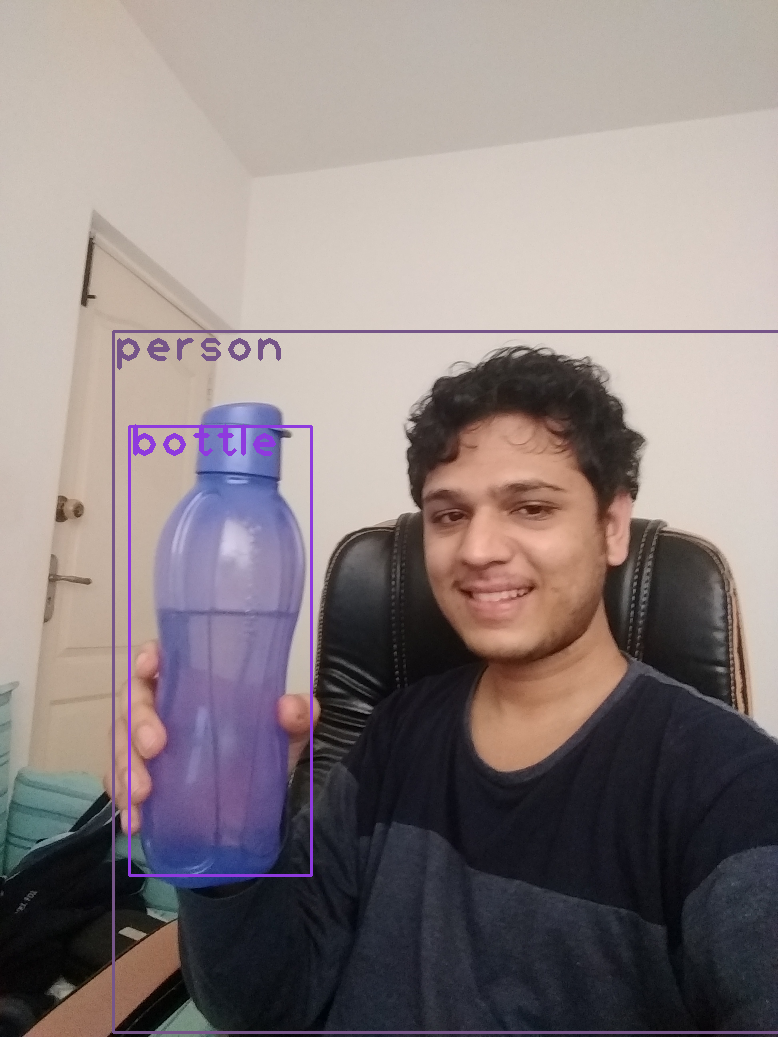

In [15]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load Yolo
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# Loading image
img = cv2.imread("/content/IMG_20201022_114548775.jpg")
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

net.setInput(blob)
outs = net.forward(output_layers)

# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
print(indexes)
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[class_ids[i]]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)


cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()